<a href="https://colab.research.google.com/github/sumanyurosha/tensorflow-specialization/blob/master/Hands-on%20ML/chapter11/Batch_Normalisation_and_Activation_Functions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from tensorflow import keras
from keras.datasets import mnist

In [6]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape, x_test.shape)

(60000, 28, 28) (10000, 28, 28)


In [7]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, activation='elu', kernel_initializer='he_normal'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100, activation='elu', kernel_initializer='he_normal'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 784)               3136      
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
batch_normalization_1 (Batch (None, 300)               1200      
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
batch_normalization_2 (Batch (None, 100)               400       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1

In [15]:
[(var.name, var.trainable) for var in model.layers[1].variables]

[('batch_normalization/gamma:0', True),
 ('batch_normalization/beta:0', True),
 ('batch_normalization/moving_mean:0', False),
 ('batch_normalization/moving_variance:0', False)]

In [16]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=15, validation_split=0.3)

Epoch 1/15
1313/1313 [==============================] - 9s 7ms/step - loss: 0.0162 - accuracy: 0.9952 - val_loss: 1.3152 - val_accuracy: 0.9710
Epoch 2/15
1313/1313 [==============================] - 9s 7ms/step - loss: 0.0155 - accuracy: 0.9954 - val_loss: 1.1807 - val_accuracy: 0.9702
Epoch 3/15
1313/1313 [==============================] - 9s 7ms/step - loss: 0.0142 - accuracy: 0.9951 - val_loss: 0.9502 - val_accuracy: 0.9714
Epoch 4/15
1313/1313 [==============================] - 10s 7ms/step - loss: 0.0125 - accuracy: 0.9962 - val_loss: 0.9409 - val_accuracy: 0.9723
Epoch 5/15
1313/1313 [==============================] - 9s 7ms/step - loss: 0.0137 - accuracy: 0.9955 - val_loss: 0.7176 - val_accuracy: 0.9710
Epoch 6/15
1313/1313 [==============================] - 9s 6ms/step - loss: 0.0137 - accuracy: 0.9956 - val_loss: 0.9661 - val_accuracy: 0.9726
Epoch 7/15
1313/1313 [==============================] - 9s 7ms/step - loss: 0.0137 - accuracy: 0.9950 - val_loss: 0.9845 - val_accuracy

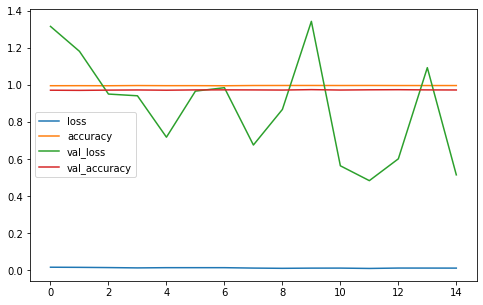

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.show()

In [22]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(128, kernel_initializer='he_normal', use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('elu'),
    keras.layers.Dense(128, kernel_initializer='he_normal', use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('elu'),
    keras.layers.Dense(10, activation='softmax')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 784)               3136      
_________________________________________________________________
dense_3 (Dense)              (None, 128)               100352    
_________________________________________________________________
batch_normalization_4 (Batch (None, 128)               512       
_________________________________________________________________
activation (Activation)      (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               16384     
_________________________________________________________________
batch_normalization_5 (Batch (None, 128)              

In [24]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

hisotry = model.fit(x_train, y_train, epochs=20, validation_split=0.2)

Epoch 1/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3042 - accuracy: 0.9105 - val_loss: 0.2217 - val_accuracy: 0.9487
Epoch 2/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1689 - accuracy: 0.9491 - val_loss: 0.2386 - val_accuracy: 0.9577
Epoch 3/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1276 - accuracy: 0.9606 - val_loss: 0.2217 - val_accuracy: 0.9659
Epoch 4/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1051 - accuracy: 0.9679 - val_loss: 0.2336 - val_accuracy: 0.9623
Epoch 5/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0910 - accuracy: 0.9715 - val_loss: 0.2002 - val_accuracy: 0.9665
Epoch 6/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0809 - accuracy: 0.9747 - val_loss: 0.2861 - val_accuracy: 0.9658
Epoch 7/20
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0722 - accuracy: 0.9774 - val_loss: 0.3559 - val_accuracy:

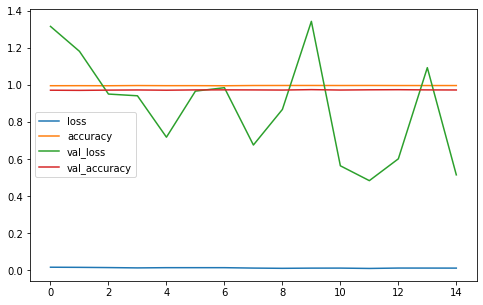

In [27]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.show()